<a id = "1"></a>
<div>
    <div style='float:left; width:55%; overflow:hidden'>
        <br><br><br><br>
        <span style = "float:right;">
        <h2><strong><span style='color:#17202a'> Forecasting and Time Series Analysis 📈 - LSTM 💥🔥 </span></strong></h2>
        <h4><b><span style="color:#273746"> Share Market Forecasting live data </span></b></h4> 
        <p><span style="color:#566573"> By Piyush Mahajan </span></p>
        <br>
        <b></b>
    </div>
    <div style="float:rigth; width:40%; max-height:300px; overflow: hidden;">
        <img src = 'https://i.pinimg.com/originals/65/56/d1/6556d1f996900f1b315db64ae955d524.png' width = '500px' height='300px'>
    </div>
</div>

**Hello Guys 🖐**

This is Simple Starter Notebook for **Share market forecasting using LSTM**. 

- The Purpose of this Project/Notebook is to help Invester in investing money in stock market (especially me 😅). 

- In This Notebook, I am Using yahoo finance library to extract 5 years of share market data of **TATAMOTORS** company (India) and for visualization purpose I am extensively using plotly because of its interactive plots.

- I am using 5 years **day-wise** data for building lstm, extracted from date 08-03-2017 to 02-03-2022

- If you are starting to learn Time Series data and model building, I hope this notebook will help you.

> **NOTE** I am using two libraries yfinance and yahoofinancials just because to explore 🚵‍♀️, you can use any one of them.

**<h3><span style="color: #f08ec9 ">About Dataset: </span></h3>**

1. **Open** - It is a Opening price of stock at that date.

2. **High** - The highest price reached by stock at that day.
3. **Low**- The Lowest price reached by stock at that day.
4. **Close** - It is the Closing price of stock that is, Price of stock at closing time of share market.
5. **Volume** - It is the total number of shares exchanged at that day. 

I am not going to used other two columns but they may be useful in forecasting but i am going to ignore them.

<a id='2'></a>
# <span style= "color: #5494ff " id = 'Table of content'>Table of Content</span>

<a id="toc"></a>
- [Introduction](#1)
- [Table of Content](#2)
- [1. Libraries](#3)
- [2. Importing and Creation of dataset](#4)
- [3. Exploring dataset and Visualization](#5)
    - [3.1 Changing Format of dataset](#5.1)
    - [3.2 Line and Candle Plot](#5.2)
    - [3.3 Volume plot](#5.3)
    - [3.4 Combinated Candle and Volume plot](#5.4)
    - [3.5 Box Plot](#5.5)
    - [3.6 Histogram for distribution on values](#5.6)
    - [3.7 Moving average line plot](#5.7)
    - [3.8 Differencing Dataset](#5.8)
- [4. Dataset Creation for LSTM](#6)
    - [4.1 Mean Value Dataset](#6.1)
    - [4.2 Volume Dataset](#6.2)
    - [4.2 Price Dataset having multiple values in target](#6.3)
    - [4.3 Price and Volume Combined dataset](#6.4)
- [5 Splitting dataset](#7)
    - [5.1 Splitting dataframe](#7.1)
    - [5.2 Splitting Combined data](#7.2)
- [6. Model Building](#8)
    - [6.1 Imports](#8.1)


<a id="3"></a>
# <span><center style="background-color: ; color: #5494ff ;"><strong>1. Libraries 📚</strong></center></span>

In [1]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import os

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore


y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline

RANDOM_SEED = 15
np.random.seed(15)

In [4]:
PATH = os.getcwd()
PATH

'h:\\Excelr\\Project\\Stock_Prediction\\Program'

In [7]:
CSV_PATH = 'H:\\Excelr\\Project\\Stock_Prediction\\csv_files\\'

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '4'></a>
# <span><center style=' color: #5494ff '><strong>2. Importing dataset 📈📊</strong></center></span>

In [5]:
# tatamotors_2m = tatamotors.history('max', interval='2m', start= '2022-02-01')  # YYYY-MM-DD
# tatamotors_5year = tatamotors.history('max', interval='1d', start= '2021-11-01')

In [6]:
def Fetch_data(symbol, interval = '1d', data_of_years = 1):
    if interval in ['2m', '5m', '15m', '30m']:
        print('Sorry, but only 2 month data can be extracted for given interval')
        current_time = datetime.datetime.now()
        month_value = current_time.month - 2       
        """
        Following can be used to get 2 month previous date
        datetime.datetime.now()-datetime.timedelta(days=60)
        """
        starting_date = current_time.replace(month= month_value)
    else:
        year_value = datetime.datetime.now().year-data_of_years
        ending_date = datetime.datetime.now()
        starting_date = ending_date.replace(year=year_value)
    data = yf.Ticker(symbol)
    data = data.history(interval=interval, start= starting_date)
    return data

def save_to_csv(data, file_name, location = os.getcwd()):
    file_name = location+file_name
    data.to_csv(file_name)

In [8]:
tatamotors_5year = pd.read_csv(os.path.join(CSV_PATH,'Tatamotors_5years.csv'))

In [10]:
tatamotors_5year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0
1,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0
2,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0
3,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0
4,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0


In [11]:
tatamotors_5year.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1231,2022-03-02,452.950012,454.250000,444.549988,447.600006,25791134,0,0
1232,2022-03-03,458.500000,458.500000,435.000000,437.100006,29599672,0,0
1233,2022-03-04,431.850006,431.850006,414.750000,417.250000,38765185,0,0
1234,2022-03-07,401.750000,401.750000,387.500000,394.000000,44836205,0,0
1235,2022-03-08,390.500000,395.450012,376.350006,391.750000,55526844,0,0


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a> 
# <span><center style="color: #5494ff "><strong>3. Exploring Dataset and Visualization </strong> </center></span>

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<a id = "5.1"></a>
## **<span style = "color: #5494ff ;">3.1 Changing Format of dataset</span>**

- We have dataset of stock prices of TATAMOTORS, in which we have to change indexes to datetime that is setting Date Column as index

### **<span style= 'color: #5494ff '>Changing format of 1 year dataset</span>**

In [20]:
tatamotors_5year.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

If you are using dataframe returned by **yfinance**, Then there is not need to change Date Column into Datetime format. 
But saving it and then importing into Notebook, you have to take care of Date Column

In [21]:
# tatamotors_5year['Date_1'] = tatamotors_5year.Date
tatamotors_5year['Date'] = pd.to_datetime(tatamotors_5year.Date)
tatamotors_5year['Index'] = tatamotors_5year.Date
tatamotors_5year=tatamotors_5year.set_index('Index')
# tatamotors_5year['Date']=tatamotors_5year.Date.astype('datetime64')

In [22]:
tatamotors_5year['Years'] = tatamotors_5year.Date.dt.year
tatamotors_5year['Months'] = tatamotors_5year.Date.dt.month
tatamotors_5year['Days'] = tatamotors_5year.Date.dt.day
tatamotors_5year['Day_name'] = tatamotors_5year.Date.dt.day_name()

In [23]:
tatamotors_5year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-03-08 to 2022-03-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1236 non-null   datetime64[ns]
 1   Open          1236 non-null   float64       
 2   High          1236 non-null   float64       
 3   Low           1236 non-null   float64       
 4   Close         1236 non-null   float64       
 5   Volume        1236 non-null   int64         
 6   Dividends     1236 non-null   int64         
 7   Stock Splits  1236 non-null   int64         
 8   Years         1236 non-null   int64         
 9   Months        1236 non-null   int64         
 10  Days          1236 non-null   int64         
 11  Day_name      1236 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 125.5+ KB


In [24]:
T = tatamotors_5year.index.max() - datetime.timedelta(weeks = 52)

In [29]:
print(f"{bl_} 52 week High is {y_}{tatamotors_5year['High'][T:].max()}")
print(f"{bl_} 52 week Low is {y_}{tatamotors_5year['Low'][T:].min()}")

 52 week High is 536.7000122070312
 52 week Low is 268.45001220703125


In [24]:
tatamotors_5year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2017-03-08,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0,2017,3,8,Wednesday
2017-03-09,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0,2017,3,9,Thursday
2017-03-10,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0,2017,3,10,Friday
2017-03-14,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0,2017,3,14,Tuesday
2017-03-15,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0,2017,3,15,Wednesday


* Highest value in 2021

In [31]:
tatamotors_5year.groupby('Years').get_group(2021).High.max(axis = 0)

536.7000122070312

* > If you try to plot candle plot on dataframe, then there will be many gaps in between some candles with represent the Holidays.
* > So The following code findout those dates and can be used in candle plot, so that there will be no gaps between candles.

In [32]:
# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=tatamotors_5year.index[0],end=tatamotors_5year.index[-1])  # retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(tatamotors_5year.index)]  # define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [33]:
print(f'The first 5 break days are {dt_breaks[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks)}')

The first 5 break days are ['2017-03-11', '2017-03-12', '2017-03-13', '2017-03-18', '2017-03-19']

Total number of break days are 591


<a id = '5.2'> </a>
## **<span style = 'color: #5494ff '>3.2 Line and Candle plots </span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

### **<span style= 'color: #5494ff '>Line plot day wise</span>**

In [34]:
fig = go.Figure([go.Scatter(x= tatamotors_5year.index, y = tatamotors_5year['High'])])
fig.update_layout(hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])
fig.show()


### **<span style= 'color: #5494ff '>Candle plot day wise</span>**

* Following candle plot is using all data  i.e with Holidays.
* If you zoom in, you can see those gaps between some candles.

In [36]:

fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(width = 1200, height = 600 
        , xaxis_rangeslider_visible = False, hovermode = 'x unified')

fig.show()

* > In following plot, I am removing all Sunday and Saturday. 
But still there are some other holidays so in next plot i will remove all holidays

In [39]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')

fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [40]:
# Day map without any gap

fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])


fig.show()

### **<span style= 'color: #5494ff '>OHLC plot day wise</span>**

In [41]:
ohlc = go.Figure(data = [go.Ohlc(x = tatamotors_5year.index, 
                open = tatamotors_5year[('Open')],
                high = tatamotors_5year[('High')],
                low = tatamotors_5year[('Low')],
                close = tatamotors_5year[('Close')])])

ohlc.update_xaxes(title_text = 'Time', rangeslider_visible = True,
    rangebreaks = [dict(values = dt_breaks)])
ohlc.show()

In [43]:
## To check the gaps between time series
(tatamotors_5year.index[1:]-tatamotors_5year.index[:-1]).value_counts().head()

1 days    938
3 days    227
2 days     37
4 days     32
5 days      1
Name: Index, dtype: int64

> <h5> Observation from previous cell. </h5>

1. The first obserdation shows that there are **938 values having one day gap** (8/4/22 and 9/4/22 have gap of one day). i.e Continous values.
2. The Second observation shows that there are **227 values having gap of three days**.
3. The Third observation shows that there are **37 values having gap of two days**.

etc.


<a id = '5.3'></a>
## **<span style= 'color: #5494ff '>3.3 Volume plot </span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

### **<span style= 'color: #5494ff '>Day Wise Volume plot</span>**

In [52]:
area = px.area(data_frame= tatamotors_5year, 
    x = tatamotors_5year.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
area.update_layout(width = 1500, height = 700)

area.update_xaxes(title_text = 'Date', rangeslider_visible = False,
    rangebreaks = [dict(values = dt_breaks)])
area.show()

<a id = '5.4'></a>
## **<span style= 'color: #5494ff '>3.4 Combination of Candle plot & Volume plot </span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [53]:
def Combo_candle_volume_plot(data,day_gap=None, height = 800, width = 1000, slider = False):
    fig = make_subplots(rows= 2, cols= 1)

    fig.append_trace(go.Candlestick(x = data.index, 
                    open = data['Open'],
                    high = data['High'],
                    low = data['Low'],
                    close = data['Close']), row = 1, col = 1)

    fig.update_xaxes(rangebreaks = [dict(values = day_gap)])
    fig.append_trace(go.Scatter(x = data.index, 
            y = data.Volume, fill='tozeroy'), row = 2, col = 1)

    
    fig.update_layout(xaxis_rangeslider_visible = slider, hovermode = 'x unified')
    fig.update_layout(height = height, width = width)
    fig.show()

In [54]:
Combo_candle_volume_plot(tatamotors_5year, dt_breaks)

<a id = '5.5'></a>
## **<span style= 'color: #5494ff '>3.5 Box Plots</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<AxesSubplot:xlabel='Months', ylabel='High'>

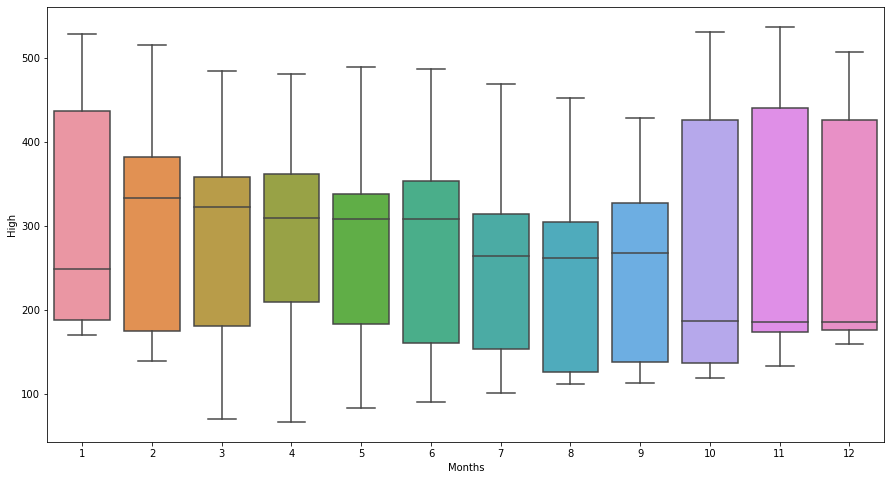

In [57]:
plt.figure(figsize= (15,8))
sns.boxplot(x = tatamotors_5year.Months, y = tatamotors_5year.High)

<a id = '5.6'></a>
## **<span style= 'color: #5494ff '>3.6 Histogram for Distribution on values</span>** 

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [59]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = tatamotors_5year.Open, name='Open'))
fig.add_trace(go.Histogram(x = tatamotors_5year.Low, name='Low'))
fig.add_trace(go.Histogram(x = tatamotors_5year.High, name= 'High'))
fig.update_layout(width = 1000, height = 600)
fig.show()

In [60]:
px.histogram(x = tatamotors_5year.Open)

<a id = '5.7'></a>
## **<span style= 'color: #5494ff '>3.7 Moving average line plot</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [61]:
tatamotors_5year['Moving_avg_2'] = tatamotors_5year.High.rolling(2).mean()
tatamotors_5year['Moving_avg_5'] = tatamotors_5year.High.rolling(5).mean()
tatamotors_5year['Moving_avg_10'] = tatamotors_5year.High.rolling(10).mean()

In [62]:
tatamotors_5year[['High', 'Moving_avg_2', 'Moving_avg_5']].head(5)

,High,Moving_avg_2,Moving_avg_5
Index,,,
2017-03-08,469.600006,NaN,NaN
2017-03-09,469.700012,469.650009,NaN
2017-03-10,471.850006,470.775009,NaN
2017-03-14,483.000000,477.425003,NaN
2017-03-15,476.549988,479.774994,474.140002


In [63]:
fig = px.line(data_frame=tatamotors_5year.iloc[:100,:], 
        x = tatamotors_5year.index[:100],
        y = ['High', 'Moving_avg_2', 'Moving_avg_5', 'Moving_avg_10'])
fig.update_layout(hovermode = 'x unified')

<a id = '5.8'></a>
## **<span style= 'color: #5494ff '>3.8 Differencing dataset<span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

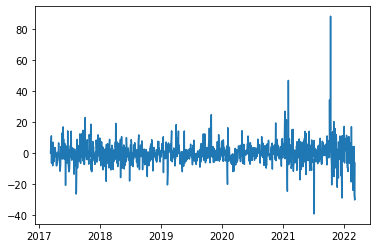

In [64]:
plt.plot(tatamotors_5year.High.diff(1))

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = tatamotors_5year.index, y = tatamotors_5year['High'].pct_change(1)))
# fig.add_trace(go.Line())
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '6'></a>
# <span><center style="color:#5494ff"><strong>4. Dataset Creation for LSTM</strong></center></span>

In [80]:
tatamotors_5year.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2017-03-08,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0,2017,3,8,Wednesday
2017-03-09,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0,2017,3,9,Thursday
2017-03-10,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0,2017,3,10,Friday
2017-03-14,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0,2017,3,14,Tuesday
2017-03-15,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0,2017,3,15,Wednesday


In [81]:
tatamotors_5year['Mean']=np.mean(tatamotors_5year.iloc[:,1:5], axis = 1)

In [82]:
tatamotors_2m['Mean'] = np.mean(tatamotors_2m.iloc[:,1:5], axis = 1)

In [83]:
# To create dataset for LSTM
# def Time_series_dataset(data_column, time_steps):
#     dataset = []
#     target = []
#     for i in range(data_column.shape[0]-time_steps-1):
#         a = data_column[i:time_steps+i].to_list()
#         target_value = data_column[time_steps+i]
#         target.append(target_value)
#         dataset.append(a)
#     df = pd.DataFrame(dataset)
#     df['Target'] = target
#     return df

In [84]:
def Time_series_dataset(data, time_step, columns, target_colm, values_in_target = 1, dataframe = False):
    '''
    This function returns two arrays one dataset and other target dataset.
    target dataset can be singular or multiples 
    - data : dataframe object consists of feature and target_colm
    - time_step : window size for building dataset
    - columns : list of columns that will be used as features
    - target_colm : list of target_colm 
    - values_in_target : It is the no of values should be in target columns of dataset
    '''
    n = len(columns)
    for i in range(data.shape[0]-time_step-values_in_target):
        values = data[columns][i:time_step+i].to_numpy().reshape(-1,time_step,n)

        target_value = data[target_colm].iloc[time_step+i:time_step+i+values_in_target,:].to_numpy()
        target_value = target_value.reshape(-1, target_value.shape[0], target_value.shape[1])
        if i == 0:
            dataset = values
            target_values = target_value
        else:
            dataset = np.concatenate((dataset, values))
            target_values = np.concatenate((target_values, target_value))
    if columns == target_colm and len(columns) == 1 and dataframe is True:
        dataset = dataset.reshape(dataset.shape[0], -1)
        target_values = target_values.reshape(dataset.shape[0], -1)
        data = pd.DataFrame(dataset)
        data['target'] = target_values
        return data
    else:
        if len(target_colm)==1:
            target_values = target_values.reshape(target_values.shape[0], -1)
        return dataset, target_values

<a id = '6.1'></a>
## **<span style= 'color: #5494ff '>4.1 Mean Value Dataset</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

### **<span style= 'color: #5494ff '>Day wise dataset</span>**

In [85]:
mean_value_dataset = Time_series_dataset(tatamotors_5year, 50, ['Open'], ['Open'], dataframe= True)
mean_value_dataset.shape

(1185, 51)

In [86]:
mean_value_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,469.399994,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,...,427.799988,434.000000,429.649994,434.00,432.25,436.500000,442.000000,439.000000,446.000000,451.450012
1,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,...,434.000000,429.649994,434.000000,432.25,436.50,442.000000,439.000000,446.000000,451.450012,470.000000
2,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,...,429.649994,434.000000,432.250000,436.50,442.00,439.000000,446.000000,451.450012,470.000000,470.000000
3,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,...,434.000000,432.250000,436.500000,442.00,439.00,446.000000,451.450012,470.000000,470.000000,474.100006
4,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,467.500000,...,432.250000,436.500000,442.000000,439.00,446.00,451.450012,470.000000,470.000000,474.100006,482.500000


<a id = '6.2'></a>
## **<span style= 'color: #5494ff '>4.2 Volume dataset</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [66]:
volume_dataset = Time_series_dataset(tatamotors_5year, 50, ['Volume'], ['Volume'], dataframe= True)

In [67]:
volume_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,5351597,3837624,5766815,6348198,4801312,6272947,6338248,2871104,4685410,4695648,...,5378402,4049649,3850940,1885702,3452072,6572678,6158546,4387481,6145914,10330814
1,3837624,5766815,6348198,4801312,6272947,6338248,2871104,4685410,4695648,8665384,...,4049649,3850940,1885702,3452072,6572678,6158546,4387481,6145914,10330814,27370795
2,5766815,6348198,4801312,6272947,6338248,2871104,4685410,4695648,8665384,4296510,...,3850940,1885702,3452072,6572678,6158546,4387481,6145914,10330814,27370795,15108872
3,6348198,4801312,6272947,6338248,2871104,4685410,4695648,8665384,4296510,4417413,...,1885702,3452072,6572678,6158546,4387481,6145914,10330814,27370795,15108872,7692869
4,4801312,6272947,6338248,2871104,4685410,4695648,8665384,4296510,4417413,2982614,...,3452072,6572678,6158546,4387481,6145914,10330814,27370795,15108872,7692869,4253044


<a id = '6.3'></a>
## **<span style= 'color: #5494ff '>4.3 Dataset Having Multiple values in target</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<a id = '6.3.1'></a>
### **<span style= 'color: #5494ff '>4.3.1 Single Feature in Target with Multiple values</span>**

In [70]:
open_dataset_multi, target_multi = Time_series_dataset(tatamotors_5year, 70, ['Open']
        , ['Open'], values_in_target= 10)

In [71]:
open_dataset_multi.shape, target_multi.shape

((1156, 70, 1), (1156, 10))

In [72]:
target_multi = target_multi.reshape((-1, target_multi.shape[1]))
target_multi.shape

(1156, 10)

<a id = '6.3.2'></a>
### **<span style= 'color: #5494ff '>4.3.2 Multiple Feature in Target with Multiple values</span>**

In [73]:
open_dataset_multi_target, target_multi_target = Time_series_dataset(tatamotors_5year, 80, ['Open', 'Volume']
        , ['Open', 'Volume'], values_in_target= 10)

In [74]:
open_dataset_multi_target.shape, target_multi_target.shape

((1146, 80, 2), (1146, 10, 2))

In [75]:
target_multi_target[0]

array([[4.28899994e+02, 5.05074900e+06],
       [4.35399994e+02, 4.03818800e+06],
       [4.34450012e+02, 5.31173000e+06],
       [4.46600006e+02, 1.15472100e+06],
       [4.52000000e+02, 1.20690060e+07],
       [4.61000000e+02, 6.05154000e+06],
       [4.64500000e+02, 4.38206300e+06],
       [4.60000000e+02, 3.97426900e+06],
       [4.55000000e+02, 4.92245300e+06],
       [4.52600006e+02, 2.34926800e+06]])

<a id = '6.4'></a>
## **<span style= 'color: #5494ff '>4.4 Dataset Having Single values in Target</span>**

<a id = '6.4.1'></a>
### **<span style= 'color: #5494ff '>4.4.1 Single Feature in Target with Single values</span>**

In [76]:
day_combo_data, day_combo_target = Time_series_dataset(tatamotors_5year,
     50, columns=['Open', 'Volume'], target_colm= ['Open'])

In [77]:
day_combo_data.shape, day_combo_target.shape

((1185, 50, 2), (1185, 1))

In [78]:
combo_dataset_df = pd.DataFrame(day_combo_data[:,:,0])
combo_dataset_df['Y']= day_combo_target.reshape(-1, day_combo_target.shape[1])

In [79]:
combo_dataset_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Y
0,469.399994,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,...,427.799988,434.000000,429.649994,434.000000,432.250000,436.500000,442.000000,439.000000,446.000000,451.450012
1,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,...,434.000000,429.649994,434.000000,432.250000,436.500000,442.000000,439.000000,446.000000,451.450012,470.000000
2,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,...,429.649994,434.000000,432.250000,436.500000,442.000000,439.000000,446.000000,451.450012,470.000000,470.000000
3,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,...,434.000000,432.250000,436.500000,442.000000,439.000000,446.000000,451.450012,470.000000,470.000000,474.100006
4,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,467.500000,...,432.250000,436.500000,442.000000,439.000000,446.000000,451.450012,470.000000,470.000000,474.100006,482.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,488.000000,459.899994,452.100006,458.149994,476.000000,474.899994,465.700012,475.200012,478.750000,472.549988,...,476.149994,504.000000,505.899994,498.000000,490.149994,480.549988,481.750000,455.950012,444.850006,445.000000
1181,459.899994,452.100006,458.149994,476.000000,474.899994,465.700012,475.200012,478.750000,472.549988,472.700012,...,504.000000,505.899994,498.000000,490.149994,480.549988,481.750000,455.950012,444.850006,445.000000,452.950012
1182,452.100006,458.149994,476.000000,474.899994,465.700012,475.200012,478.750000,472.549988,472.700012,493.500000,...,505.899994,498.000000,490.149994,480.549988,481.750000,455.950012,444.850006,445.000000,452.950012,458.500000
1183,458.149994,476.000000,474.899994,465.700012,475.200012,478.750000,472.549988,472.700012,493.500000,496.799988,...,498.000000,490.149994,480.549988,481.750000,455.950012,444.850006,445.000000,452.950012,458.500000,431.850006


<a id = '6.4.2'></a>
### **<span style= 'color: #5494ff '>4.4.2 Multiple Feature in Target with Single values</span>**

In [80]:
combo_dataset_2, target_2 = Time_series_dataset(tatamotors_5year, 50, ['Open', 'Volume'], target_colm=['Open', 'Volume'])

In [81]:
target_2

array([[[4.51450012e+02, 1.03308140e+07]],

       [[4.70000000e+02, 2.73707950e+07]],

       [[4.70000000e+02, 1.51088720e+07]],

       ...,

       [[4.58500000e+02, 2.95996720e+07]],

       [[4.31850006e+02, 3.87651850e+07]],

       [[4.01750000e+02, 4.48362050e+07]]])

In [82]:
combo_dataset_2.shape, target_2.shape

((1185, 50, 2), (1185, 1, 2))

In [83]:
open_1 = pd.DataFrame(day_combo_data[:,:,0])
open_1['Target'] = target_2[:,:,0]

volume_1 = pd.DataFrame(day_combo_data[:,:,1])
volume_1['Target'] = target_2[:,:,1]

In [84]:
open_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,469.399994,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,...,427.799988,434.000000,429.649994,434.00,432.25,436.500000,442.000000,439.000000,446.000000,451.450012
1,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,...,434.000000,429.649994,434.000000,432.25,436.50,442.000000,439.000000,446.000000,451.450012,470.000000
2,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,...,429.649994,434.000000,432.250000,436.50,442.00,439.000000,446.000000,451.450012,470.000000,470.000000
3,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,...,434.000000,432.250000,436.500000,442.00,439.00,446.000000,451.450012,470.000000,470.000000,474.100006
4,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,467.500000,...,432.250000,436.500000,442.000000,439.00,446.00,451.450012,470.000000,470.000000,474.100006,482.500000


In [85]:
volume_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,5351597.0,3837624.0,5766815.0,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,...,5378402.0,4049649.0,3850940.0,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0
1,3837624.0,5766815.0,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,...,4049649.0,3850940.0,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0
2,5766815.0,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,4296510.0,...,3850940.0,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0,15108872.0
3,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,4296510.0,4417413.0,...,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0,15108872.0,7692869.0
4,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,4296510.0,4417413.0,2982614.0,...,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0,15108872.0,7692869.0,4253044.0


<a id = '7'></a>
# <span><center style="color:#5494ff"><strong>5. Split into Train, Test and Validation dataset</strong></center></span>

In [87]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

def Splitting_dataset(data, train_ratio = train_ratio, valid_ratio = None, target_variable = None):
    '''
    This Function Splits time series data into train, test and validation data with given percentages
    
    - train_ratio : percentage of data contained in training set
    - valid_ratio : percentage of data contained in validation set
    - target_variable : If given data does not contain final column as target column then provide target array

    Return:
    - If valid_ratio is provided the dataset will be split into 3 set with order as:
    x_train, x_val, x_test, y_train, y_val, y_test

    - If only train_ratio is provided the dataset will be divided into 2 sets as:
    x_train, x_test, y_train, y_test
    '''
    if target_variable is None:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            valid_rows = int(obs*valid_ratio)
            A = training_rows+valid_rows
            x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
            x_val, y_val = data.iloc[training_rows:A, :-1].to_numpy(), data.iloc[training_rows:A, -1].to_numpy()
            x_test, y_test = data.iloc[A:,:-1].to_numpy(), data.iloc[A:,-1].to_numpy()
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
            x_test, y_test = data.iloc[training_rows:, :-1].to_numpy(), data.iloc[training_rows:,-1].to_numpy()
            return x_train, x_test, y_train, y_test

    else:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            valid_rows = int(obs*valid_ratio)
            A = training_rows+valid_rows
            x_train, y_train = data[:training_rows], target_variable[:training_rows]
            x_val, y_val = data[training_rows:A], target_variable[training_rows:A]
            x_test, y_test = data[A:], target_variable[A:]
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, y_train = data[:training_rows], target_variable[:training_rows]
            x_test, y_test = data[training_rows:], target_variable[training_rows:]
            return x_train, x_test, y_train, y_test






def transformation_min_max(data, min, max):
    data = (data - min)/(max- min)
    return data

<a id = '7.1'></a>
## **<span style= 'color: #5494ff '>5.1 Dataset Having Single Target value</span>**

<a id = '7.1.1'></a>
### **<span style= 'color: #5494ff '>5.1.1 Dataset with single feature</span>**

In [88]:
x_train_mean, x_val_mean, x_test_mean, y_train_mean, y_val_mean, y_test_mean = Splitting_dataset(
                mean_value_dataset,valid_ratio= validation_ratio)

In [89]:
x_train_mean.shape, x_test_mean.shape, x_val_mean.shape

((829, 50), (179, 50), (177, 50))

In [90]:
train_max = x_train_mean.max()
train_min = x_train_mean.min()

In [91]:
x_train_mean = transformation_min_max(x_train_mean, train_min, train_max)
x_test_mean = transformation_min_max(x_test_mean, train_min, train_max)
x_val_mean = transformation_min_max(x_val_mean, train_min, train_max)
y_train_mean = transformation_min_max(y_train_mean, train_min, train_max)
y_test_mean = transformation_min_max(y_test_mean, train_min, train_max)
y_val_mean = transformation_min_max(y_val_mean, train_min, train_max)

In [92]:
x_test_mean.shape

(179, 50)

In [93]:
x_train_mean = x_train_mean.reshape(x_train_mean.shape[0], x_train_mean.shape[1], 1)
x_val_mean = x_val_mean.reshape(x_val_mean.shape[0], x_val_mean.shape[1], 1)
x_test_mean = x_test_mean.reshape(x_test_mean.shape[0], x_test_mean.shape[1], 1)

In [94]:
x_train_mean.shape, y_train_mean.shape

((829, 50, 1), (829,))

In [95]:
x_train_mean[-1]

array([[0.09486071],
       [0.10086455],
       [0.09353986],
       [0.09173871],
       [0.09005764],
       [0.08597503],
       [0.09990394],
       [0.09582133],
       [0.09005764],
       [0.0876561 ],
       [0.11155139],
       [0.11023055],
       [0.11935638],
       [0.12127762],
       [0.12836215],
       [0.14048992],
       [0.13088377],
       [0.1431316 ],
       [0.15525935],
       [0.13928915],
       [0.13808838],
       [0.14529299],
       [0.13676753],
       [0.13856868],
       [0.1332853 ],
       [0.132805  ],
       [0.15369837],
       [0.17675314],
       [0.18647933],
       [0.18731989],
       [0.18467818],
       [0.18683959],
       [0.20437081],
       [0.1954851 ],
       [0.20052834],
       [0.19920749],
       [0.17891451],
       [0.18323728],
       [0.18395775],
       [0.19380403],
       [0.1990874 ],
       [0.1986071 ],
       [0.20244958],
       [0.19740634],
       [0.19512488],
       [0.1717099 ],
       [0.16570605],
       [0.147

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '7.1.2'></a>
### **<span style= 'color: #5494ff '>5.1.2 Dataset with Multiple feature</span>**

In [94]:
x_train_comb, x_val_comb, x_test_comb, y_train_comb, y_val_comb, y_test_comb=Splitting_dataset(
        day_combo_data, target_variable= day_combo_target, valid_ratio=validation_ratio)

In [95]:
y_train_comb =y_train_comb.reshape(y_train_comb.shape[0], -1)
y_test_comb =y_test_comb.reshape(y_test_comb.shape[0], -1)
y_val_comb =y_val_comb.reshape(y_val_comb.shape[0], -1)

In [96]:
x_train_comb.shape, y_train_comb.shape, x_val_comb.shape, x_test_comb.shape

((829, 50, 2), (829, 1), (177, 50, 2), (179, 50, 2))

In [97]:
y_train_comb

array([[451.45001221],
       [470.        ],
       [470.        ],
       [474.1000061 ],
       [482.5       ],
       [482.70001221],
       [482.29998779],
       [476.95001221],
       [480.        ],
       [478.29998779],
       [482.8999939 ],
       [462.54998779],
       [459.5       ],
       [459.95001221],
       [463.75      ],
       [457.1499939 ],
       [450.79998779],
       [452.        ],
       [454.70001221],
       [453.79998779],
       [457.        ],
       [466.        ],
       [458.8500061 ],
       [454.        ],
       [443.79998779],
       [443.8999939 ],
       [444.5       ],
       [433.8999939 ],
       [431.5       ],
       [434.20001221],
       [428.8999939 ],
       [435.3999939 ],
       [434.45001221],
       [446.6000061 ],
       [452.        ],
       [461.        ],
       [464.5       ],
       [460.        ],
       [455.        ],
       [452.6000061 ],
       [453.        ],
       [463.5       ],
       [460.        ],
       [464

In [98]:
train_max_comb=x_train_comb.max(axis = (0,1))
train_min_comb = x_train_comb.min(axis = (0,1))

In [99]:
train_max_comb

array([4.82899994e+02, 2.15476711e+08])

In [100]:
x_train_comb = transformation_min_max(x_train_comb, train_min_comb, train_max_comb)
x_test_comb = transformation_min_max(x_test_comb, train_min_comb, train_max_comb)
x_val_comb = transformation_min_max(x_val_comb, train_min_comb, train_max_comb)

y_train_comb = transformation_min_max(y_train_comb, train_min_comb[0], train_max_comb[0])
y_test_comb = transformation_min_max(y_test_comb, train_min_comb[0], train_max_comb[0])
y_val_comb = transformation_min_max(y_val_comb, train_min_comb[0], train_max_comb[0])

In [101]:
x_train_comb.shape, y_train_comb.shape

((829, 50, 2), (829, 1))

<a id = '7.2'></a>
## **<span style= 'color: #5494ff '>5.2 Dataset with Multiple feature in target having single target values</span>**

In [102]:
x_train_comb_2, x_val_comb_2, x_test_comb_2, y_train_comb_2, y_val_comb_2, y_test_comb_2=Splitting_dataset(
        combo_dataset_2, target_variable= target_2, valid_ratio=validation_ratio)

In [103]:
x_train_comb_2.shape, y_train_comb_2.shape, x_val_comb_2.shape, x_test_comb_2.shape

((829, 50, 2), (829, 1, 2), (177, 50, 2), (179, 50, 2))

In [104]:
train_max_comb_2=x_train_comb_2.max(axis = (0,1))
train_min_comb_2 = x_train_comb_2.min(axis = (0,1))

In [105]:
train_max_comb_2

array([4.82899994e+02, 2.15476711e+08])

In [106]:
x_train_comb_2 = transformation_min_max(x_train_comb_2, train_min_comb_2, train_max_comb_2)
x_test_comb_2 = transformation_min_max(x_test_comb_2, train_min_comb_2, train_max_comb_2)
x_val_comb_2 = transformation_min_max(x_val_comb_2, train_min_comb_2, train_max_comb_2)

y_train_comb_2 = transformation_min_max(y_train_comb_2, train_min_comb_2, train_max_comb_2).reshape((-1,2))
y_test_comb_2 = transformation_min_max(y_test_comb_2, train_min_comb_2, train_max_comb_2).reshape((-1,2))
y_val_comb_2 = transformation_min_max(y_val_comb_2, train_min_comb_2, train_max_comb_2).reshape((-1,2))

In [107]:
x_train_comb_2.shape, y_train_comb_2.shape

((829, 50, 2), (829, 2))

In [108]:
y_train_comb_2.max(axis = 0), x_test_comb_2.max(axis = 0)[0], x_train_comb_2.max(axis = (0,1))

(array([1., 1.]), array([1.11659467, 0.91821967]), array([1., 1.]))

<a id = '7.3'></a>
## **<span style= 'color: #5494ff '>5.3 Dataset with Single feature in target having Multi target values</span>**

In [109]:
x_train_multi, x_val_multi, x_test_multi, y_train_multi, y_val_multi, y_test_multi=Splitting_dataset(
        open_dataset_multi, target_variable= target_multi, valid_ratio=validation_ratio)

In [110]:
x_train_multi.shape, y_train_multi.shape, x_val_multi.shape, x_test_multi.shape

((809, 70, 1), (809, 10), (173, 70, 1), (174, 70, 1))

In [111]:
x_train_multi.max(axis = (0,1))

array([482.8999939])

In [112]:
train_min_multi = x_train_multi.min(axis = (0,1))
train_max_multi = x_train_multi.max(axis = (0,1))

In [113]:
x_train_multi = transformation_min_max(x_train_multi, train_min_multi, train_max_multi)
x_test_multi = transformation_min_max(x_test_multi, train_min_multi, train_max_multi)
x_val_multi = transformation_min_max(x_val_multi, train_min_multi, train_max_multi)

y_train_multi = transformation_min_max(y_train_multi, train_min_multi, train_max_multi)
y_test_multi = transformation_min_max(y_test_multi, train_min_multi, train_max_multi)
y_val_multi = transformation_min_max(y_val_multi, train_min_multi, train_max_multi)

In [114]:
x_train_multi.shape, y_train_multi.shape, 

((809, 70, 1), (809, 10))

In [115]:
x_train_multi.max(axis = (0,1)), x_test_multi.max(axis = (0,1)), y_train_multi.max()

(array([1.]), array([1.11659467]), 0.9594140390389014)

<a id = '7.4'></a>
## **<span style= 'color: #5494ff '>5.4 Dataset with Multiple feature in target having Multi target values</span>**

In [116]:
x_train_multi_target, x_val_multi_target, x_test_multi_target, y_train_multi_target, y_val_multi_target, y_test_multi_target=Splitting_dataset(
        open_dataset_multi_target, target_variable= target_multi_target, valid_ratio=validation_ratio)

In [117]:
x_train_multi_target.shape, y_train_multi_target.shape, x_val_multi_target.shape, x_test_multi_target.shape

((802, 80, 2), (802, 10, 2), (171, 80, 2), (173, 80, 2))

In [118]:
x_train_multi_target.max(axis = (0,1))

array([4.82899994e+02, 2.15476711e+08])

In [119]:
U = pd.DataFrame(x_train_multi_target[:,:,0])
V = pd.DataFrame(y_train_multi_target[:,:,0])

U.shape

(802, 80)

In [120]:
pd.concat((U,V), axis = 1).iloc[:10,75:]

,75,76,77,78,79,0,1,2,3,4,5,6,7,8,9
0,443.899994,444.500000,433.899994,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006
1,444.500000,433.899994,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000
2,433.899994,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000
3,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000
4,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012
5,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994
6,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012
7,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012,459.000000
8,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012,459.000000,444.600006
9,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012,459.000000,444.600006,446.250000


In [121]:
train_min_multi_target = x_train_multi_target.min(axis = (0,1))
train_max_multi_target = x_train_multi_target.max(axis = (0,1))

In [122]:
train_min_multi_target, train_max_multi_target

(array([6.650000e+01, 1.154721e+06]), array([4.82899994e+02, 2.15476711e+08]))

In [123]:
x_train_multi_target = transformation_min_max(x_train_multi_target, train_min_multi_target, train_max_multi_target)
x_test_multi_target = transformation_min_max(x_test_multi_target, train_min_multi_target, train_max_multi_target)
x_val_multi_target = transformation_min_max(x_val_multi_target, train_min_multi_target, train_max_multi_target)

y_train_multi_target = transformation_min_max(y_train_multi_target, train_min_multi_target, train_max_multi_target)
y_test_multi_target = transformation_min_max(y_test_multi_target, train_min_multi_target, train_max_multi_target)
y_val_multi_target = transformation_min_max(y_val_multi_target, train_min_multi_target, train_max_multi_target)

In [124]:
x_train_multi_target.shape, y_train_multi_target.shape, 

((802, 80, 2), (802, 10, 2))

In [125]:
(x_train_multi_target.max(axis = (0,1)), 
x_test_multi_target.max(axis = (0,1)), y_train_multi_target.max())

(array([1., 1.]), array([1.11659467, 0.91821967]), 1.0)

<a id = '8'></a>
# <span><center style="color:#5494ff"><strong>6. Model Building</strong></center></span>

<a id = "8.1"></a>
## **<span style = "color: #5494ff ;">6.1 Imports</span>**

In [100]:
import tensorflow as tf

from tensorflow.keras import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

tf.random.set_seed(RANDOM_SEED)

In [101]:
MODEL_SAVE_PATH = './model_weights/'

In [102]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [103]:
def Prediction_fun(data, model, no_predictions):
    '''
    This function return array of forecast values given data and model,
    forecasts no_prediction steps
    '''
    predictions = []
    last_steps = data[-1]
    last_values = last_steps.reshape(-1, last_steps.shape[0], last_steps.shape[1])
    for i in range(no_predictions):
        prediction = model.predict(last_values)
        predictions.extend(prediction.tolist())
        prediction = prediction.reshape(-1, prediction.shape[0], prediction.shape[1])
        last_values = np.concatenate((last_values[:,1:,:], prediction), axis = 1)
    return np.array(predictions)

def Reverse_transform(max, min, values):
    values = values*(max - min) + min
    return values


def Evaluate_model(model, x_test, y_test, transform_max=None, transform_min = None, 
        x_val = None, y_val = None, no_prediction=None):
    
    original_y_test = Reverse_transform(transform_max, transform_min, y_test)

    if transform_max is not None:
        if x_val is not None:
            original_y_val = Reverse_transform(transform_max ,transform_min, y_val)
            print("The Model errors on validation dataset before reverse_transform is: ")
            print(f'{model.evaluate(x_val, y_val, verbose= 0)}')
            val_pred = Reverse_transform(transform_max, transform_min, model.predict(x_val))
            print("The Model Absolute error on validation dataset after reverse_transform is: ")
            print(f"{mean_absolute_error(original_y_val, val_pred)}")
            print('-~'*40)
            
        print("The Model errors on test dataset before reverse_transform is: ")
        print(f'{model.evaluate(x_test, y_test, verbose= 0)}')
        test_pred = Reverse_transform(transform_max, transform_min, model.predict(x_test))
        print("The Model Absolute error on test dataset after reverse_transform is: ")
        print(f"{mean_absolute_error(original_y_test, test_pred)}")
        ax = plt.plot(original_y_test, label = 'Test')
        ax.append(plt.plot(test_pred, label = 'Test_prediction'))
        if no_prediction:
            plot_prediction(x_test, y_test, model, transform_max, transform_min, no_prediction)
        plt.title('Test dataset')
        plt.legend()
        plt.show()

def plot_prediction(time_series_data, target,  model, d_max, d_min , no_prediction= 10):
    prediction = Prediction_fun(time_series_data, model, no_prediction)
    prediction = Reverse_transform(d_max, d_min, prediction)
    A = np.empty_like(target)
    A.fill(None)
    A = np.concatenate((A, prediction.ravel()))
    target = Reverse_transform(d_max, d_min, target)
    # plt.plot(target)
    ax = plt.plot(A, label = 'Future')
    return A

<a id = "8.2"></a>
## **<span style = "color: #5494ff ;">6.2 Neural Model Building</span>**

### **<span style = "color: #5494ff ;">6.2.1 Model 1 day_wise separate data</span>**

In [134]:
model = Sequential([
    LSTM(100, activation= 'relu', input_shape = (50,1)),
    Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanAbsoluteError(), metrics= [tf.keras.losses.MAE])

In [135]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


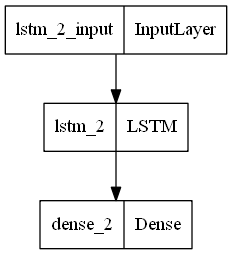

In [136]:
plot_model(model)

In [137]:
x_train_mean.shape

(829, 50, 1)

In [138]:
model.fit(x_train_mean, y_train_mean,shuffle=False, epochs= 1, validation_data= [x_val_mean, y_val_mean])

26/26 [==============================] - 18s 499ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - val_loss: 0.1299 - val_mean_absolute_error: 0.1299


In [139]:
len(model.get_weights())

5

In [ ]:
for a in model.weights:
    print(f'{bl_}Layer name is {b_}{a.name}')
    print(f'{bl_}Weights shape is {b_}{a.shape}')

Layer name is lstm_2/lstm_cell_2/kernel:0
Weights shape is (1, 400)
Layer name is lstm_2/lstm_cell_2/recurrent_kernel:0
Weights shape is (100, 400)
Layer name is lstm_2/lstm_cell_2/bias:0
Weights shape is (400,)
Layer name is dense_2/kernel:0
Weights shape is (100, 1)
Layer name is dense_2/bias:0
Weights shape is (1,)


The Model errors on validation dataset before reverse_transform is: 
[0.07579434663057327, 0.07579434663057327]
The Model Absolute error on validation dataset after reverse_transform is: 
31.56076618776483
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
The Model errors on test dataset before reverse_transform is: 
[0.13855686783790588, 0.13855686783790588]
The Model Absolute error on test dataset after reverse_transform is: 
57.695085408301324


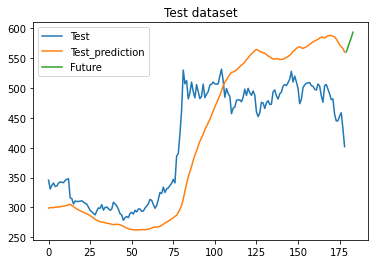

In [ ]:
Evaluate_model(model, x_test_mean, y_test_mean, train_max, train_min, x_val_mean, y_val_mean, 5)

In [ ]:
model.predict(x_test_mean).shape

(179, 1)

### **<span style = "color: #5494ff ;">6.2.2 Model 1 day_wise combo data</span>**

In [ ]:
model_combo = Sequential([
    LSTM(50,input_shape = (50,2)),
    Dense(1)
])

model_combo.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_combo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10600     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


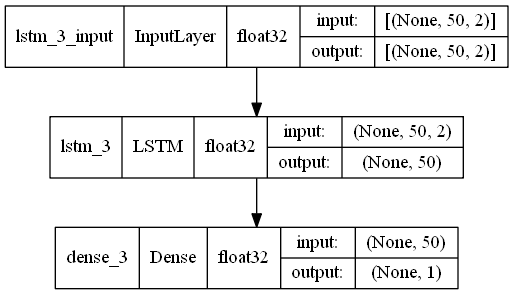

In [ ]:
plot_model(model_combo, show_shapes=True, show_dtype= True)

In [ ]:
model_combo.fit(x_train_comb, y_train_comb, epochs= 10, 
    validation_data= [x_val_comb, y_val_comb])

Epoch 1/10
26/26 [==============================] - 4s 44ms/step - loss: 0.5484 - mean_absolute_error: 0.4471 - val_loss: 0.0307 - val_mean_absolute_error: 0.1475
Epoch 2/10
26/26 [==============================] - 1s 21ms/step - loss: 0.0048 - mean_absolute_error: 0.0511 - val_loss: 0.0037 - val_mean_absolute_error: 0.0356
Epoch 3/10
26/26 [==============================] - 0s 18ms/step - loss: 5.8778e-04 - mean_absolute_error: 0.0191 - val_loss: 3.6918e-04 - val_mean_absolute_error: 0.0140
Epoch 4/10
26/26 [==============================] - 0s 19ms/step - loss: 4.5817e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0016 - val_mean_absolute_error: 0.0359
Epoch 5/10
26/26 [==============================] - 0s 18ms/step - loss: 5.5725e-04 - mean_absolute_error: 0.0192 - val_loss: 5.5110e-04 - val_mean_absolute_error: 0.0161
Epoch 6/10
26/26 [==============================] - 1s 20ms/step - loss: 2.9485e-04 - mean_absolute_error: 0.0131 - val_loss: 5.5299e-04 - val_mean_absolute_error: 0

In [ ]:
model_combo.evaluate(x_val_comb, y_val_comb)

6/6 [==============================] - 0s 18ms/step - loss: 4.8024e-04 - mean_absolute_error: 0.0154


[0.000480236136354506, 0.015415276400744915]

In [ ]:
model_combo.evaluate(x_test_comb, y_test_comb)

6/6 [==============================] - 0s 16ms/step - loss: 0.0011 - mean_absolute_error: 0.0227


[0.0011007210705429316, 0.02273426204919815]

In [ ]:
model_combo.predict(x_test_comb).shape

(179, 1)

In [ ]:
x_test_comb.shape

(179, 50, 2)

The Model errors on validation dataset before reverse_transform is: 
[0.000480236136354506, 0.015415276400744915]
The Model Absolute error on validation dataset after reverse_transform is: 
6.552102686995167
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
The Model errors on test dataset before reverse_transform is: 
[0.0011007210705429316, 0.02273426204919815]
The Model Absolute error on test dataset after reverse_transform is: 
9.347357041342967


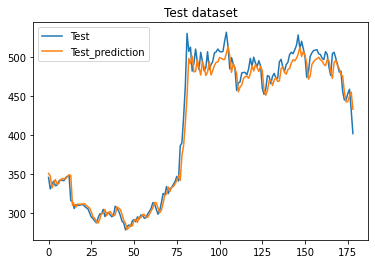

In [ ]:
Evaluate_model(model_combo, x_test_comb, y_test_comb, 
    train_max_comb[0], train_min_comb[0], x_val_comb, y_val_comb)

In [ ]:
y_pred_comb = model_combo.predict(x_val_comb)

In [ ]:
y_pred_test = model_combo.predict(x_test_comb)

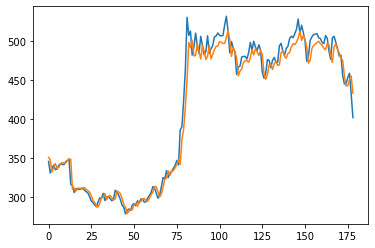

In [ ]:
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_test_comb))
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_pred_test))

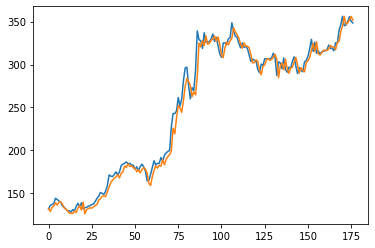

In [ ]:
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_val_comb))
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_pred_comb))

In [ ]:
len(model_combo.get_weights())

5

In [ ]:
for a in model_combo.weights:
    print(f'{bl_}Layer name is {b_}{a.name}')
    print(f'{bl_}Weights shape is {b_}{a.shape}')

Layer name is lstm_3/lstm_cell_3/kernel:0
Weights shape is (2, 200)
Layer name is lstm_3/lstm_cell_3/recurrent_kernel:0
Weights shape is (50, 200)
Layer name is lstm_3/lstm_cell_3/bias:0
Weights shape is (200,)
Layer name is dense_3/kernel:0
Weights shape is (50, 1)
Layer name is dense_3/bias:0
Weights shape is (1,)


### **<span style = "color: #5494ff ;">6.2.3 Model 2 day_wise</span>**

In [ ]:
model_1 = Sequential([
    LSTM(50,activation = 'relu', input_shape = (50,1), return_sequences= True),
    layers.Dropout(0.3),
    LSTM(50, activation = 'relu', return_sequences= True),
    LSTM(50, activation = 'relu', return_sequences= False),
    Dense(1)
])

model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


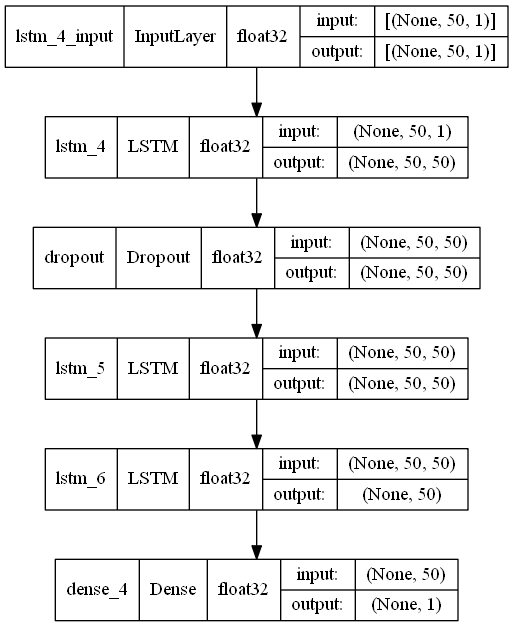

In [ ]:
plot_model(model_1, show_shapes=True, show_dtype= True)

In [ ]:
x_train_mean.shape

(829, 50, 1)

In [ ]:
model_1.fit(x_train_mean, y_train_mean, epochs= 1, 
    validation_data= [x_val_mean, y_val_mean])

26/26 [==============================] - 60s 2s/step - loss: 0.1030 - mean_absolute_error: 0.2306 - val_loss: 0.0200 - val_mean_absolute_error: 0.1251


In [ ]:
model_1.evaluate(x_val_mean, y_val_mean)

6/6 [==============================] - 1s 145ms/step - loss: 0.0200 - mean_absolute_error: 0.1251


[0.019968420267105103, 0.12510500848293304]

In [ ]:
model_1.evaluate(x_test_mean, y_test_mean)

6/6 [==============================] - 1s 190ms/step - loss: 0.0705 - mean_absolute_error: 0.2349


[0.07050559669733047, 0.23492443561553955]

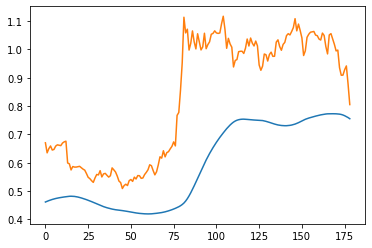

In [ ]:
plt.plot(model_1.predict(x_test_mean))
plt.plot(y_test_mean)

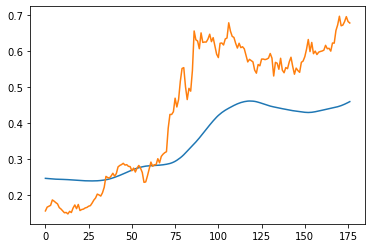

In [ ]:
plt.plot(model_1.predict(x_val_mean))
plt.plot(y_val_mean)

The Model errors on test dataset before reverse_transform is: 
[0.07050559669733047, 0.23492443561553955]
The Model Absolute error on test dataset after reverse_transform is: 
98.53879832688656


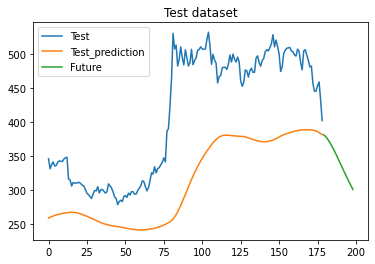

In [ ]:
Evaluate_model(model_1, x_test_mean, y_test_mean, train_max, train_min, no_prediction= 20)

### **<span style = "color: #5494ff ;">6.2.4 Model 2 day_wise combo</span>**

In [262]:
tf.random.set_seed(RANDOM_SEED)
model_combo_2 = Sequential([
    LSTM(50,input_shape = (50,2)),
    Dense(2)
])

model_combo_2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [263]:
model_combo_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10600     
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________


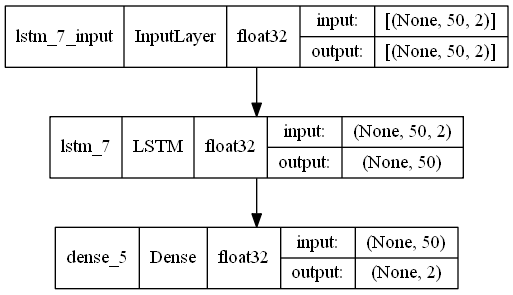

In [264]:
plot_model(model_combo_2, show_shapes=True, show_dtype= True)

In [265]:
model_combo_2.fit(x_train_comb_2, y_train_comb_2, epochs= 10, 
    validation_data= [x_val_comb_2, y_val_comb_2])

Epoch 1/10
26/26 [==============================] - 7s 151ms/step - loss: 0.0634 - mean_absolute_error: 0.1874 - val_loss: 0.0709 - val_mean_absolute_error: 0.1792
Epoch 2/10
26/26 [==============================] - 2s 94ms/step - loss: 0.0535 - mean_absolute_error: 0.1807 - val_loss: 0.0698 - val_mean_absolute_error: 0.1747
Epoch 3/10
26/26 [==============================] - 6s 243ms/step - loss: 0.0527 - mean_absolute_error: 0.1802 - val_loss: 0.0680 - val_mean_absolute_error: 0.1730
Epoch 4/10
26/26 [==============================] - 2s 78ms/step - loss: 0.0535 - mean_absolute_error: 0.1812 - val_loss: 0.0642 - val_mean_absolute_error: 0.1637
Epoch 5/10
26/26 [==============================] - 1s 55ms/step - loss: 0.0529 - mean_absolute_error: 0.1793 - val_loss: 0.0653 - val_mean_absolute_error: 0.1722
Epoch 6/10
26/26 [==============================] - 1s 51ms/step - loss: 0.0526 - mean_absolute_error: 0.1814 - val_loss: 0.0671 - val_mean_absolute_error: 0.1808
Epoch 7/10
26/26 [==

In [266]:
y_pred = model_combo_2.predict(x_test_comb_2)
y_pred.shape

(179, 2)

In [267]:
y_price = y_pred[:,0]
y_vol = y_pred[:,1]

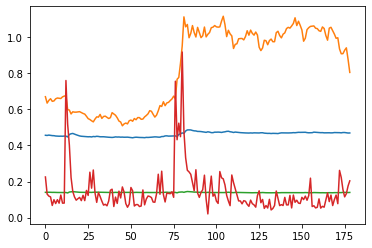

In [268]:
plt.plot(y_price)
plt.plot(y_test_comb_2[:,:,0])
plt.plot(y_vol)
plt.plot(y_test_comb_2[:,:,1])

In [269]:
Evaluate_model(model_combo_2, x_test_comb_2, y_test_comb_2, train_max_comb_2, train_min_comb_2)

The Model errors on test dataset before reverse_transform is: 
[0.09579137712717056, 0.22168119251728058]
The Model Absolute error on test dataset after reverse_transform is: 


ValueError: Found array with dim 3. Estimator expected <= 2.

### **<span style = "color: #5494ff ;">6.2.5 Model 2 day_wise combo bidirections</span>**

In [350]:
model_combo_2_bi = Sequential([
    layers.Bidirectional(LSTM(50, 
        kernel_regularizer= tf.keras.regularizers.L2(0.1)), 
        input_shape = (50,2)),
    Dense(2)
])

model_combo_2_bi.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [351]:
model_combo_2_bi.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 100)              21200     
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 2)                 202       
                                                                 
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________


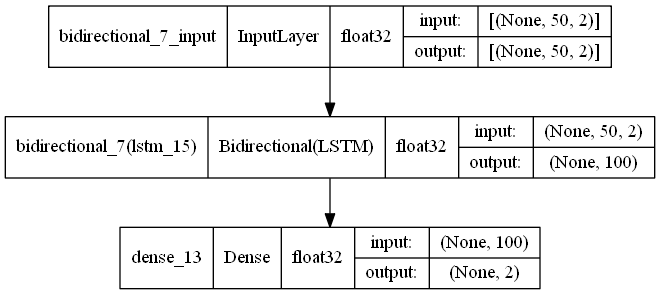

In [352]:
plot_model(model_combo_2_bi, show_shapes=True, show_dtype= True)

In [353]:
model_combo_2_bi.fit(x_train_comb_2, y_train_comb_2, epochs= 25, 
    validation_data= [x_val_comb_2, y_val_comb_2])

Epoch 1/25
26/26 [==============================] - 13s 125ms/step - loss: 0.1955 - mean_absolute_error: 0.1103 - val_loss: 0.0790 - val_mean_absolute_error: 0.1335
Epoch 2/25
26/26 [==============================] - 1s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0782 - val_loss: 0.0579 - val_mean_absolute_error: 0.1291
Epoch 3/25
26/26 [==============================] - 1s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0700 - val_loss: 0.0571 - val_mean_absolute_error: 0.1436
Epoch 4/25
26/26 [==============================] - 1s 31ms/step - loss: 0.0102 - mean_absolute_error: 0.0638 - val_loss: 0.0583 - val_mean_absolute_error: 0.1495
Epoch 5/25
26/26 [==============================] - 1s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0651 - val_loss: 0.0611 - val_mean_absolute_error: 0.1619
Epoch 6/25
26/26 [==============================] - 1s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0645 - val_loss: 0.0605 - val_mean_absolute_error: 0.1491
Epoch 7/25
26/26 [==

In [356]:
model_combo_2_bi.save_weights(MODEL_SAVE_PATH + 'model_combo_bidir.h5')

In [357]:
model_combo_2_bi.save(MODEL_SAVE_PATH + 'model_combo_whole.h5')

In [358]:
y_pred = model_combo_2_bi.predict(x_test_comb_2)

In [359]:
y_pred.shape

(179, 2)

In [324]:
y_test_comb_2.shape

(179, 2)

In [325]:
y_test_comb_2[:,0]

array([0.67038904, 0.63496637, 0.64985593, 0.65922191, 0.64481269,
       0.64697406, 0.65874157, 0.66318443, 0.66162345, 0.66042268,
       0.66954849, 0.67375118, 0.67603267, 0.59918349, 0.59630161,
       0.57468778, 0.58669546, 0.58477426, 0.58477426, 0.58597503,
       0.58741597, 0.58225268, 0.57756965, 0.57396735, 0.56195966,
       0.54875121, 0.54394813, 0.53674352, 0.53085973, 0.54634967,
       0.55871757, 0.55715659, 0.57216619, 0.54995198, 0.56087894,
       0.56256005, 0.55571565, 0.54947164, 0.55427471, 0.58189239,
       0.57504807, 0.56748317, 0.55331411, 0.53554276, 0.53001925,
       0.50912585, 0.51945243, 0.52437562, 0.5196926 , 0.53698369,
       0.54094621, 0.53434199, 0.54935159, 0.54274737, 0.55475505,
       0.55439484, 0.5451489 , 0.54634967, 0.55835736, 0.56616235,
       0.57540828, 0.59293948, 0.58957734, 0.57252641, 0.55739676,
       0.56832372, 0.59245921, 0.62103749, 0.61635446, 0.64241115,
       0.62079732, 0.63580693, 0.63916906, 0.64913543, 0.65790

In [326]:
y_price = y_pred[:,0]
y_vol = y_pred[:,1]

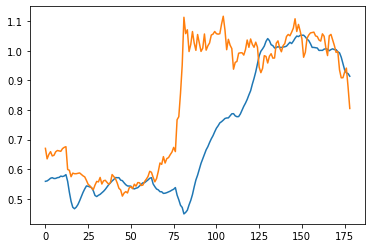

In [327]:
plt.plot(y_price)
plt.plot(y_test_comb_2[:,0])

In [328]:
forecast = Prediction_fun(x_test_comb_2, model_combo_2_bi, 30)

In [329]:
forecast_price = forecast[:,0]
forecast_vol = forecast[:,1]
forecast_price.shape, forecast_vol.shape

((30,), (30,))

In [330]:
A = np.empty_like(y_test_comb_2[:,0])

In [331]:
A = np.empty_like(y_test_comb_2[:,0])
A.fill(None)
forecast_price_1 = np.concatenate((A, forecast_price))

Text(0.5, 1.0, 'Price')

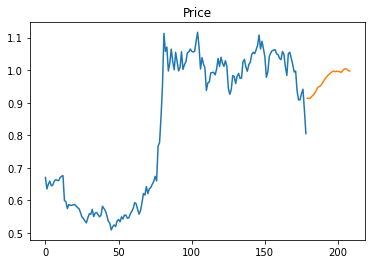

In [332]:
plt.plot(y_test_comb_2[:,0])
plt.plot(forecast_price_1)
plt.title('Price')

In [333]:
forecast_vol_1 = np.concatenate((A, forecast_vol))

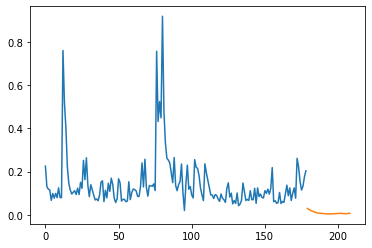

In [334]:
plt.plot(y_test_comb_2[:,1])
plt.plot(forecast_vol_1)

### **<span style = "color: #5494ff ;">6.2.6 Model with dataset having Single feature & multiple values in target</span>**

In [ ]:
x_train_multi.shape

(809, 70, 1)

In [ ]:
model_multi_open = Sequential([
    LSTM(70,input_shape = (70,1), kernel_regularizer= tf.keras.regularizers.L2(0.1)),
    Dense(10)
])

model_multi_open.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_multi_open.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70)                20160     
                                                                 
 dense (Dense)               (None, 10)                710       
                                                                 
Total params: 20,870
Trainable params: 20,870
Non-trainable params: 0
_________________________________________________________________


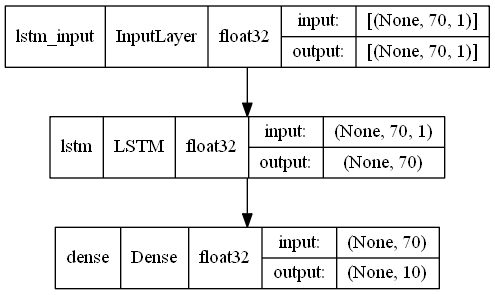

In [ ]:
plot_model(model_multi_open, show_shapes=True, show_dtype= True)

In [ ]:
model_multi_open.fit(x_train_multi, y_train_multi, epochs= 50, 
    validation_data= [x_val_multi, y_val_multi])

Epoch 1/50
26/26 [==============================] - 33s 75ms/step - loss: 0.2542 - mean_absolute_error: 0.2195 - val_loss: 0.1268 - val_mean_absolute_error: 0.0733
Epoch 2/50
26/26 [==============================] - 1s 32ms/step - loss: 0.0982 - mean_absolute_error: 0.0607 - val_loss: 0.0812 - val_mean_absolute_error: 0.0958
Epoch 3/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0553 - mean_absolute_error: 0.0508 - val_loss: 0.0482 - val_mean_absolute_error: 0.0804
Epoch 4/50
26/26 [==============================] - 1s 22ms/step - loss: 0.0321 - mean_absolute_error: 0.0510 - val_loss: 0.0378 - val_mean_absolute_error: 0.1034
Epoch 5/50
26/26 [==============================] - 1s 21ms/step - loss: 0.0187 - mean_absolute_error: 0.0478 - val_loss: 0.0330 - val_mean_absolute_error: 0.1230
Epoch 6/50
26/26 [==============================] - 1s 21ms/step - loss: 0.0123 - mean_absolute_error: 0.0510 - val_loss: 0.0267 - val_mean_absolute_error: 0.1100
Epoch 7/50
26/26 [===

The Model errors on validation dataset before reverse_transform is: 
[0.01666492037475109, 0.10246438533067703]
The Model Absolute error on validation dataset after reverse_transform is: 
41.1686999012707
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
The Model errors on test dataset before reverse_transform is: 
[0.029330557212233543, 0.11867445707321167]
The Model Absolute error on test dataset after reverse_transform is: 
51.56131249337684


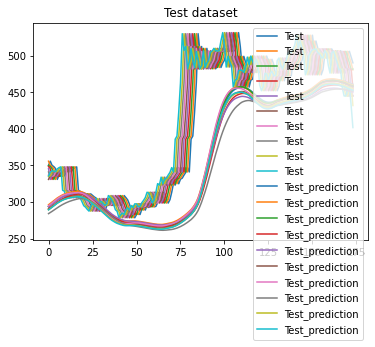

In [ ]:
Evaluate_model(model_multi_open, x_test_multi, y_test_multi, 
    train_max_multi, train_min_multi, x_val_multi, y_val_multi)

In [ ]:
x_test_multi.shape

(174, 70, 1)

In [ ]:
y_test_multi.shape

(174, 10)

In [ ]:
forecast_data = np.hstack((x_test_multi.reshape(x_test_multi.shape[0],-1), y_test_multi ))
forecast_data.shape

(174, 80)

In [ ]:
forecast_data = forecast_data[-1, -70:]
forecast_data.shape

(70,)

In [ ]:
x_test_multi.shape

(174, 70, 1)

In [ ]:
forecast_data=forecast_data.reshape(-1, forecast_data.shape[0])

In [ ]:
forecast_value = model_multi_open.predict(forecast_data)

In [ ]:
forecast_value

array([[0.90570045, 0.8976059 , 0.8959956 , 0.89491564, 0.88372713,
        0.89525354, 0.88238394, 0.8937383 , 0.88649267, 0.8806263 ]],
      dtype=float32)

In [ ]:
forecast_value=Reverse_transform(train_max_multi, train_min_multi, forecast_value )

In [ ]:
forecast_value

array([[443.63365984, 440.26308961, 439.59256941, 439.14286718,
        434.4839729 , 439.28356821, 433.92466831, 438.65263491,
        435.6355422 , 433.19279462]])

In [ ]:
T = np.empty_like(y_test_multi[:,9])
T.fill(None)

In [ ]:
T = np.concatenate((T, forecast_value.ravel()))

In [ ]:
T

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [ ]:
y_test_multi[:,9].shape

(174,)

In [ ]:
Y = Reverse_transform(train_max_multi, train_min_multi, y_test_multi[:,9])

In [ ]:
Y

array([335.8999939 , 340.79998779, 342.6499939 , 342.        ,
       341.5       , 345.29998779, 347.04998779, 348.        ,
       316.        , 314.79998779, 305.79998779, 310.79998779,
       310.        , 310.        , 310.5       , 311.1000061 ,
       308.95001221, 307.        , 305.5       , 300.5       ,
       295.        , 293.        , 290.        , 287.54998779,
       294.        , 299.1499939 , 298.5       , 304.75      ,
       295.5       , 300.04998779, 300.75      , 297.8999939 ,
       295.29998779, 297.29998779, 308.79998779, 305.95001221,
       302.79998779, 296.8999939 , 289.5       , 287.20001221,
       278.5       , 282.79998779, 284.8500061 , 282.8999939 ,
       290.1000061 , 291.75      , 289.        , 295.25      ,
       292.5       , 297.5       , 297.3500061 , 293.5       ,
       294.        , 299.        , 302.25      , 306.1000061 ,
       313.3999939 , 312.        , 304.8999939 , 298.6000061 ,
       303.1499939 , 313.20001221, 325.1000061 , 323.14

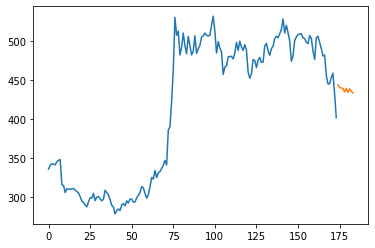

In [ ]:
plt.plot(Y)
plt.plot(T)

### **<span style = "color: #5494ff ;">6.2.7 Model with dataset having Multiple feature & multiple values in target</span>**

In [ ]:
x_train_multi_target.shape, y_train_multi_target.shape

((802, 80, 2), (802, 10, 2))

In [ ]:
RANDOM_SEED

15

In [ ]:
tf.random.set_seed(RANDOM_SEED)

inputs = tf.keras.Input(shape = (80,2))
x = LSTM(80, input_shape = (80,2), return_sequences= True )(inputs)
x = layers.Bidirectional(LSTM(80, return_sequences = True))(x)
x = layers.Bidirectional(LSTM(80))(x)


y = Dense(50, activation= 'relu')(x)
z = Dense(50, activation = 'relu')(x)
price_output = Dense(10, name = 'price_output')(y)
volume_output = Dense(10, name = 'volume_output')(z)

model_multi_target = Model(inputs = inputs, outputs = [price_output, volume_output])

In [ ]:
model_multi_target.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

tensor_board = TensorBoard('./logs/')

In [ ]:
model_multi_target.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 80, 2)]      0           []                               
                                                                                                  
 lstm_10 (LSTM)                 (None, 80, 80)       26560       ['input_2[0][0]']                
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 80, 160)     103040      ['lstm_10[0][0]']                
 )                                                                                                
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 160)         154240      ['bidirectional_3[0][0]']  

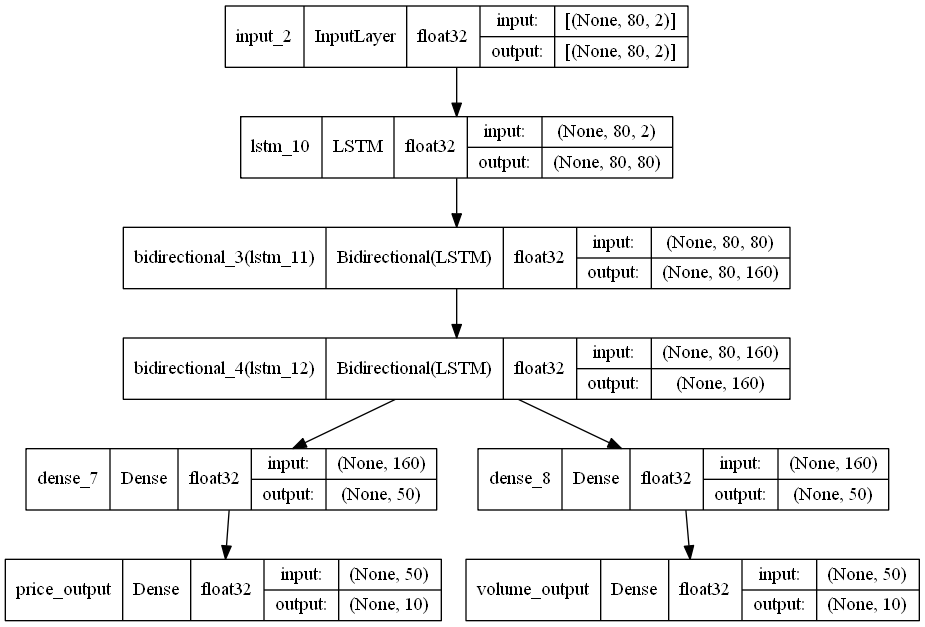

In [ ]:
plot_model(model_multi_target, show_shapes=True, show_dtype= True)

In [ ]:
y_train_multi_target[0,:,0]

array([0.870317  , 0.88592699, 0.88364558, 0.91282424, 0.92579252,
       0.94740635, 0.95581173, 0.94500482, 0.93299713, 0.92723346])

In [ ]:
model_multi_target.fit(x_train_multi_target, (y_train_multi_target[:,:,0], y_train_multi_target[:,:,1]), epochs= 50, 
    validation_data= [x_val_multi_target, (y_val_multi_target[:,:,0], y_val_multi_target[:,:,1] )],
    callbacks = [tensor_board])

Epoch 1/50
26/26 [==============================] - 22s 239ms/step - loss: 0.1223 - price_output_loss: 0.0973 - volume_output_loss: 0.0250 - price_output_mean_absolute_error: 0.2100 - volume_output_mean_absolute_error: 0.1007 - val_loss: 0.1331 - val_price_output_loss: 0.0584 - val_volume_output_loss: 0.0747 - val_price_output_mean_absolute_error: 0.1995 - val_volume_output_mean_absolute_error: 0.1550
Epoch 2/50
26/26 [==============================] - 3s 108ms/step - loss: 0.0194 - price_output_loss: 0.0073 - volume_output_loss: 0.0121 - price_output_mean_absolute_error: 0.0682 - volume_output_mean_absolute_error: 0.0691 - val_loss: 0.1068 - val_price_output_loss: 0.0362 - val_volume_output_loss: 0.0706 - val_price_output_mean_absolute_error: 0.1511 - val_volume_output_mean_absolute_error: 0.1433
Epoch 3/50
26/26 [==============================] - 3s 102ms/step - loss: 0.0158 - price_output_loss: 0.0047 - volume_output_loss: 0.0111 - price_output_mean_absolute_error: 0.0540 - volume_o

In [ ]:
MODEL_SAVE_PATH

'./model_weights'

In [ ]:
model_multi_target.save_weights(MODEL_SAVE_PATH+'/model_multi_target.h5')

In [ ]:
model_multi_target.save(MODEL_SAVE_PATH+'/model_multi_target_whole.h5')

In [ ]:
model_multi_target.save_spec()

In [ ]:
y_test_multi_target.shape


(173, 10, 2)

In [ ]:
model_multi_target.evaluate(x_test_multi_target, y=[y_test_multi_target[:,:,0], y_test_multi_target[:,:,1]])

6/6 [==============================] - 1s 75ms/step - loss: 0.0357 - price_output_loss: 0.0165 - volume_output_loss: 0.0192 - price_output_mean_absolute_error: 0.0916 - volume_output_mean_absolute_error: 0.0773


[0.035650819540023804,
 0.01648324728012085,
 0.019167568534612656,
 0.09159044176340103,
 0.0773472785949707]

In [ ]:
x_test_multi_target[-1].shape

(80, 2)

In [ ]:
price_predict, volume_predict = model_multi_target.predict(x_test_multi_target[-1].reshape(-1, 80,2))

In [ ]:
train_max_multi_target

array([4.82899994e+02, 2.15476711e+08])

In [ ]:
price_predict=Reverse_transform(train_max_multi_target[0], train_min_multi_target[0], price_predict.ravel())
volume_predict = Reverse_transform(train_max_multi_target[1], train_min_multi_target[1], volume_predict.ravel())

In [ ]:
y_test_multi_target[-1][:,0]

array([1.01741114, 0.99435637, 0.99723825, 0.93527862, 0.90862155,
       0.90898176, 0.92807401, 0.94140251, 0.87740156, 0.80511529])

In [ ]:
price_actual = Reverse_transform(train_max_multi_target[0], train_min_multi_target[0], y_test_multi_target[-1][:,0])
volume_actual = Reverse_transform(train_max_multi_target[1], train_min_multi_target[1], y_test_multi_target[-1][:,1])

In [ ]:
volume_actual, price_actual

(array([22592161., 27957544., 17703998., 57265685., 48876182., 34475468.,
        25791134., 29599672., 38765185., 44836205.]),
 array([490.1499939 , 480.54998779, 481.75      , 455.95001221,
        444.8500061 , 445.        , 452.95001221, 458.5       ,
        431.8500061 , 401.75      ]))

In [ ]:
x_test_multi_target[-1,:,0]

array([1.05487514, 1.02641691, 0.99783863, 1.0085255 , 1.05667629,
       1.00216137, 1.01657059, 1.02641691, 1.05307398, 1.0560759 ,
       1.06508167, 1.05775701, 1.0560759 , 1.05763689, 1.08969742,
       1.11659467, 1.07048513, 1.00360231, 1.03866476, 1.01897213,
       1.00744478, 0.93780021, 0.96073486, 0.9638569 , 0.99159462,
       0.99303556, 0.99327573, 0.98547073, 1.00384247, 1.03626322,
       1.01164747, 1.03974548, 1.02173395, 1.01176752, 1.02905861,
       1.01224785, 0.94476465, 0.92603269, 0.94056196, 0.98342941,
       0.9807877 , 0.95869361, 0.98150821, 0.99003364, 0.97514408,
       0.97550437, 1.02545631, 1.03338135, 1.00972627, 0.99663786,
       1.01717098, 1.02449571, 1.04827091, 1.0551153 , 1.05067245,
       1.06268013, 1.07660902, 1.10806924, 1.06508167, 1.08897699,
       1.06604227, 1.04034587, 0.978146  , 0.99483671, 1.04226707,
       1.05307398, 1.06027859, 1.06171953, 1.0629203 , 1.05019211,
       1.04803074, 1.03626322, 1.03266092, 1.05715663, 1.04887

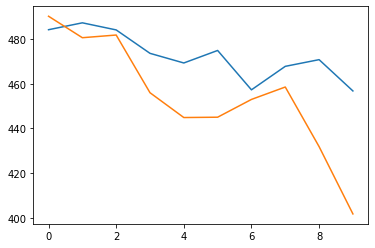

In [ ]:
plt.plot(price_predict)
plt.plot(price_actual)

### 6.2.8 Model 3 day_wise separate

In [104]:
x_train_mean.shape, y_train_mean.shape

((829, 50, 1), (829,))

In [107]:
model_3 = Sequential([
    layers.Bidirectional(LSTM(50, recurrent_regularizer= tf.keras.regularizers.L2(0.1), 
                input_shape = (50,1), return_sequences= True)),
    layers.Bidirectional(LSTM(50, recurrent_regularizer= tf.keras.regularizers.L2(0.1), 
                input_shape = (50,1), return_sequences= True)),
    GRU(50),
    Dense(25, activation = 'relu'),
    Dense(1)
])

model_3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['mae']
)

In [108]:
model_3.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [109]:
plot_model(model_3, show_shapes= True, show_layer_names = True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
model_3.fit(x_train_mean, y_train_mean, epochs = 1,
    validation_data = [x_val_mean, y_val_mean])

In [210]:
model_3.save_weights(MODEL_SAVE_PATH + 'trail/for_deployment'  )

In [205]:
model_3.save(MODEL_SAVE_PATH + 'for_deployment_whole')

INFO:tensorflow:Assets written to: ./model_weights/for_deployment_whole\assets


INFO:tensorflow:Assets written to: ./model_weights/for_deployment_whole\assets


In [166]:
model_3.evaluate(x_test_mean, y_test_mean)

6/6 [==============================] - 0s 37ms/step - loss: 0.0010 - mae: 0.0206


[0.0010037677129730582, 0.020634695887565613]

In [167]:
y_test_pred = model_3.predict(x_test_mean)

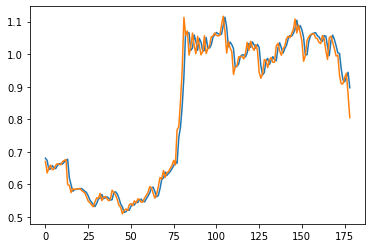

In [169]:
plt.plot(y_test_pred)
plt.plot(y_test_mean)

In [195]:
forecasting = Prediction_fun(x_test_mean, model_3, 50)
forecasting = Reverse_transform(train_max, train_min, forecasting)

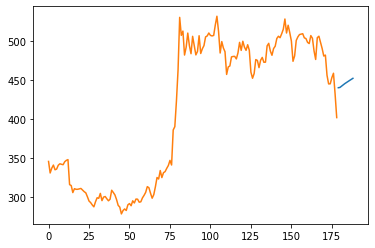

In [197]:
forecasting=plot_prediction(x_test_mean, y_test_mean, model_3, train_max, train_min, 10)
x =Reverse_transform(train_max, train_min, y_test_mean)
plt.plot(x)

In [191]:
forecasting

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [203]:
# px.line(y = forecasting)
fig = go.Figure()
fig.add_trace(go.Scatter(y = forecasting))
fig.add_trace(go.Scatter(y= x))

## **<span style = "color: #5494ff ;">6.3 LGBoost</span>**

### **<span style = "color: #5494ff ;">6.3.1 Imports</span>**

In [ ]:
import lightgbm as lgb